<font size="5"> <a href="https://uspdigital.usp.br/jupiterweb/obterDisciplina?sgldis=MAC0209"> Exercício de MAC0209 - Modelagem e Simulação</a> </font>

Rafael Baía Sales - 15484912 (IME-USP)

Rafael dos Santos Lombardi - 15485062 (IME-USP)

***
<font size="5"> EP2 - Mobilidade Pedestre </font>
***

# Setup

In [320]:
# setup aqui

## Depois a gente exporta para o Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

#################

import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sideseeing_tools import sideseeing, plot


# Lib

In [31]:
# lib aqui


# edite seu path abaixo:
# def myPath():
#   workDir = '/content/drive/MyDrive/doc/Courses/Modelagem/programas/jupyter/2022/'
#   return(workDir)

# def demoWorkDir():
#   # usa o ponto de montagem do google drive para  ler e salvar dados
#   wd = myPath()
#   csvFile = wd + 'foo.csv'

#   df = pd.read_csv(csvFile, sep = ';')
#   print(df.to_string())

# demoWorkDir()

##################

def plotxyz(
    ds: pd.core.frame.DataFrame,
    dimensions: str = "xyz",
    title: str = None,
    ylabel: str = None,
    ):
    
    fig = plt.figure(figsize=(15,5))
    if 'x' in dimensions: plt.plot(ds['Time (s)'], ds['x'], label='x')
    if 'y' in dimensions: plt.plot(ds['Time (s)'], ds['y'], label='y')
    if 'z' in dimensions: plt.plot(ds['Time (s)'], ds['z'], label='z')
    plt.xlabel("Tempo (s)")
    
    if title: plt.title(title)
    if ylabel: plt.ylabel(ylabel)
    
    plt.legend()
    plt.show()
    
    return

def plotmean(
    meands: pd.core.frame.DataFrame,
    stdds: pd.core.frame.DataFrame,
    dimensions: str = "xyz",
    title: str = None,
    ylabel: str = None,
    ):
    
    fig = plt.figure(figsize=(15,5))
    if 'x' in dimensions: plt.errorbar(x=meands.index, y=meands['x'], yerr=stdds['x'], label='x', ecolor='red', errorevery=5, capsize=2)
    if 'y' in dimensions: plt.errorbar(x=meands.index, y=meands['y'], yerr=stdds['y'], label='y', ecolor='red', errorevery=5, capsize=2)
    if 'z' in dimensions: plt.errorbar(x=meands.index, y=meands['z'], yerr=stdds['z'], label='z', ecolor='red', errorevery=5, capsize=2)
    plt.xlabel("Tempo (s)")
    
    if title: plt.title(title)
    if ylabel: plt.ylabel(ylabel)
    
    plt.legend()
    plt.show()
    
    return


---
# Main

In [309]:
mu_reta_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MU_Reta", name="MU_Reta")
mu_zz_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MU_Zigzag", name="MU_Zigzag")
muv_reta_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MUV_Reta", name="MUV_Reta")
muv_zz_ds = sideseeing.SideSeeingDS(root_dir="./MultiSensorDC", subdir_data="MUV_Zigzag", name="MUV_Zigzag")

INFO. Loading data.
INFO. Done.
INFO. Loading data.
INFO. Done.
INFO. Loading data.
INFO. Done.
INFO. Loading data.
INFO. Done.


### Sensores:

In [33]:
for sensors in ["sensors1", "sensors3", "sensors6"]:
    print(f"{sensors.capitalize()}:")
    for sensor in mu_reta_ds.sensors[sensors].keys():
        print(f" - {sensor}")
    print()

Sensors1:
 - stk33911 light  non-wakeup
 - lps22hh pressure sensor non-wakeup

Sensors3:
 - lsm6dso lsm6dso accelerometer non-wakeup
 - ak09918 magnetometer
 - lsm6dso lsm6dso gyroscope non-wakeup
 - gravity  non-wakeup
 - linear_acceleration

Sensors6:
 - ak09918 magnetometer-uncalibrated
 - lsm6dso lsm6dso gyroscope-uncalibrated non-wakeup



* Mais detalhes sobre os sensores em [https://developer.android.com/develop/sensors-and-location/sensors/sensors_overview](https://developer.android.com/develop/sensors-and-location/sensors/sensors_overview)

---
## MU Reta

TypeError: Invalid file: None

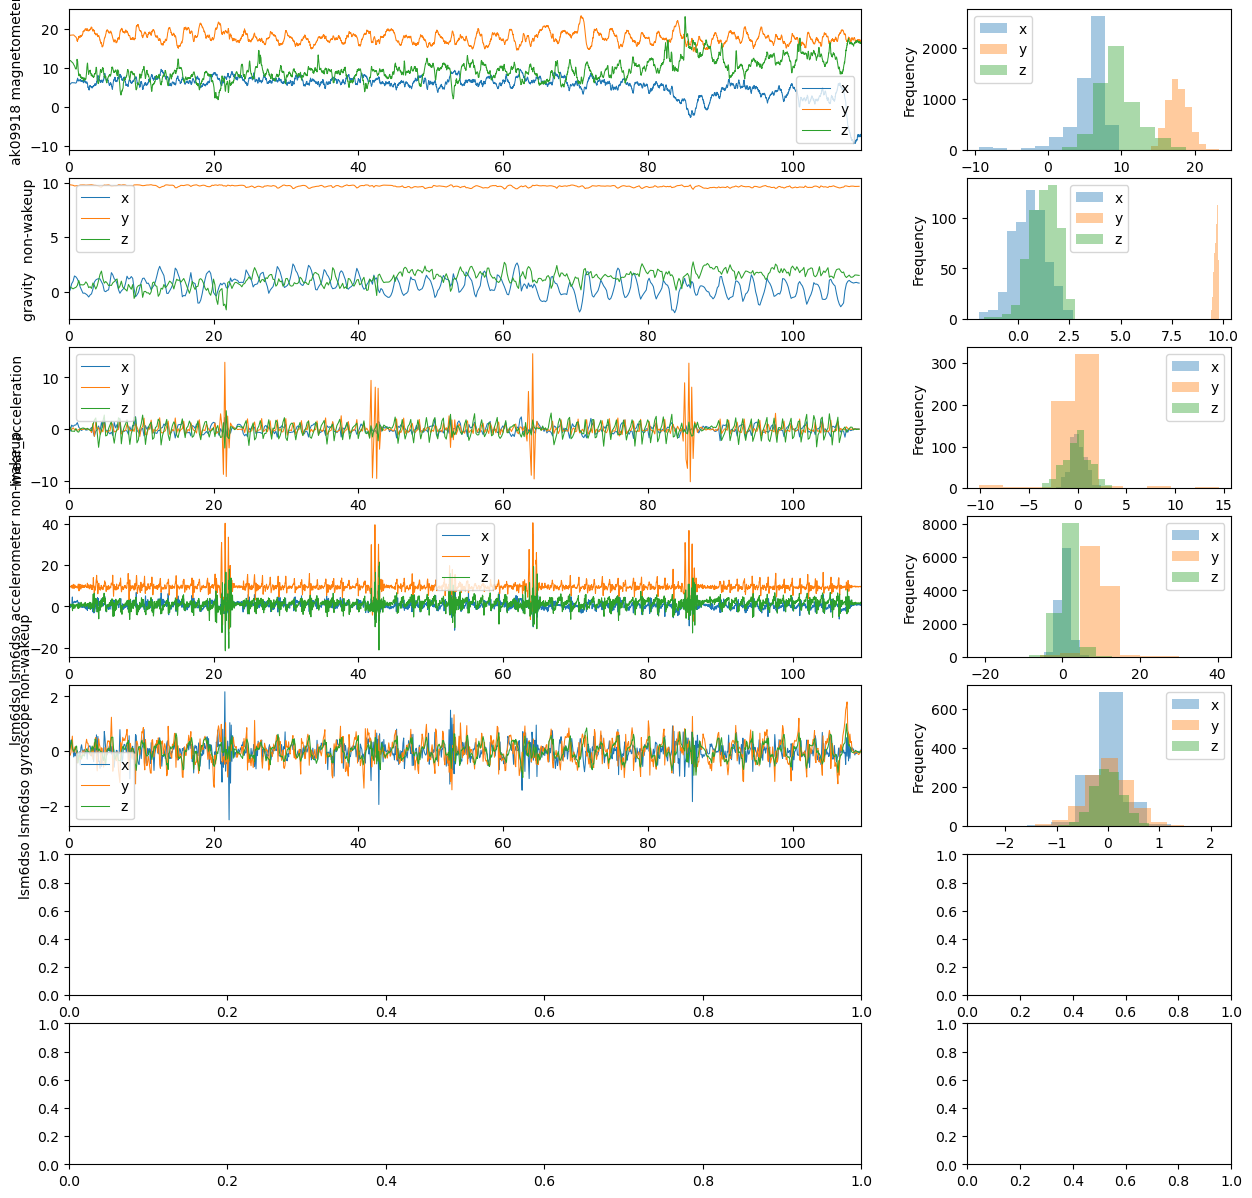

In [34]:
plotter = plot.SideSeeingPlotter(mu_reta_ds)
instance = mu_reta_ds.instance
plotter.plot_instance_sensors3_and_audio(instance)

- #### **Aceleração Linear**

Instância: '2-2025-05-22-14-53-49-691'


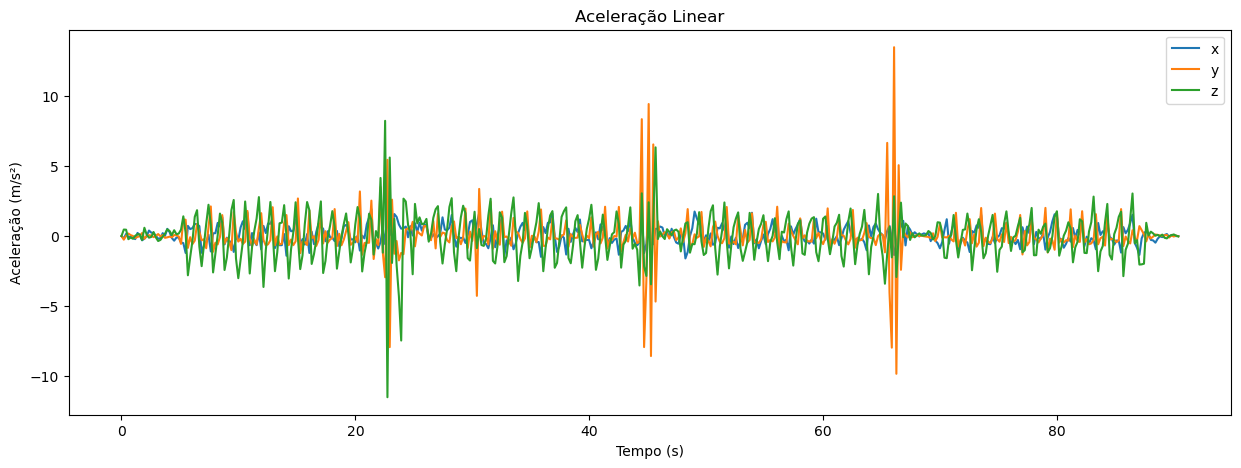

In [56]:
mu_reta_sample = mu_reta_ds.instance
print(f"Instância: '{mu_reta_sample.name}'")
mu_reta_sample_accel = mu_reta_sample.sensors3['linear_acceleration'] # Exclui a gravidade, 'lsm6dso lsm6dso accelerometer non-wakeup' inclui

plotxyz(mu_reta_sample_accel, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

Aceleração média: 0.03485288068593166
Desvio Padrão: 0.26282884111207655


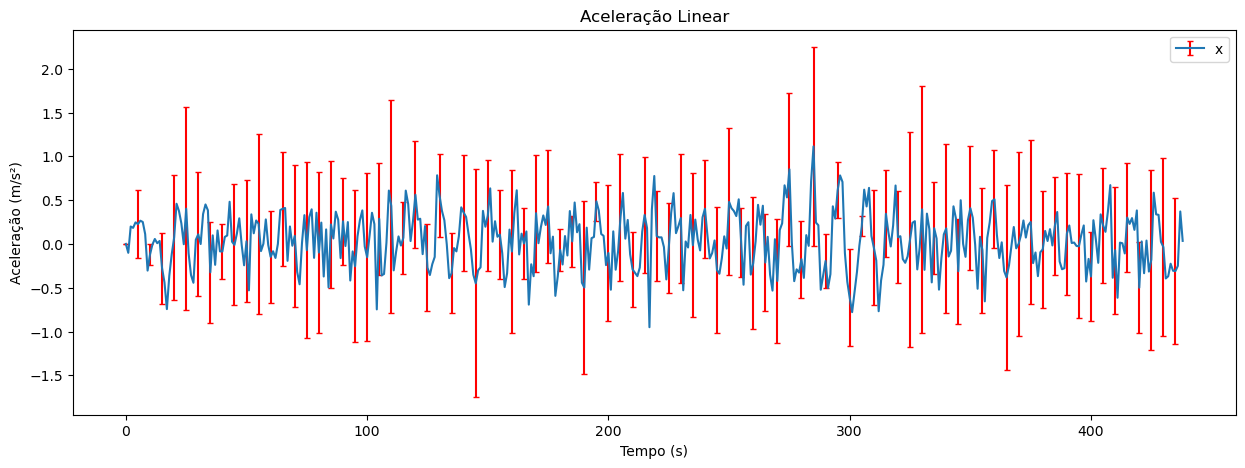

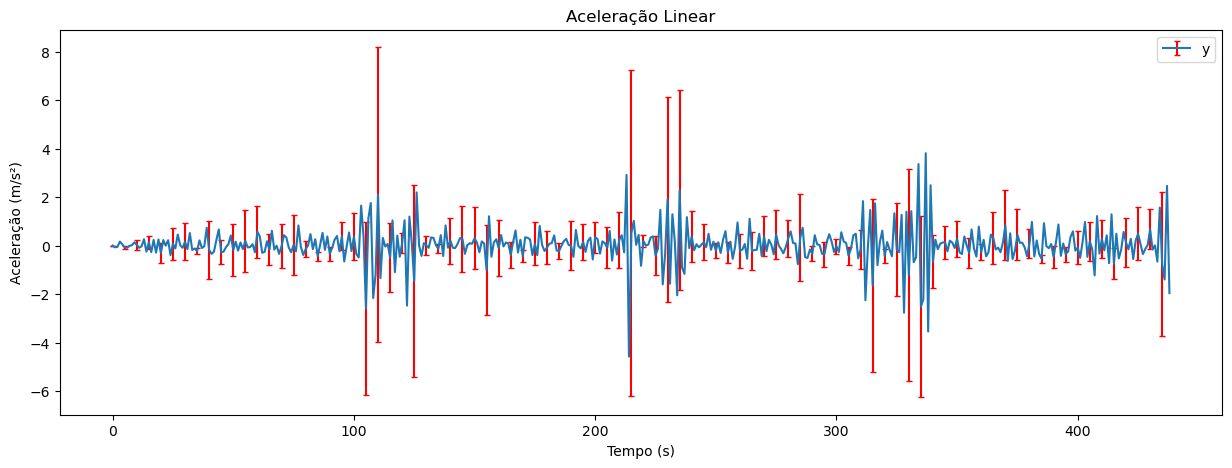

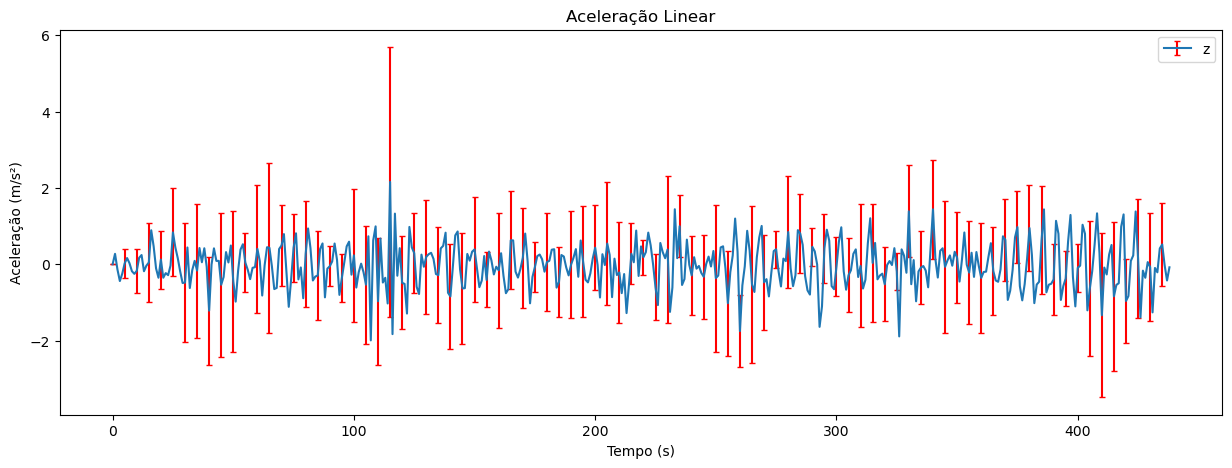

In [ ]:
instances_accel = list(map(lambda x: x.sensors3['linear_acceleration'][['x', 'y', 'z']][:439].reset_index(), mu_reta_ds.instances.values()))

instances_mean = pd.concat(instances_accel).groupby(level=0).mean()
instances_std = pd.concat(instances_accel).groupby(level=0).std()

plotmean(instances_mean, instances_std, dimensions='x', title="Aceleração Linear", ylabel="Aceleração (m/s²)")
plotmean(instances_mean, instances_std, dimensions='y', title="Aceleração Linear", ylabel="Aceleração (m/s²)")
plotmean(instances_mean, instances_std, dimensions='z', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

- #### **Campo magnético** (orientação)

Instância: '2-2025-05-22-14-55-27-504'


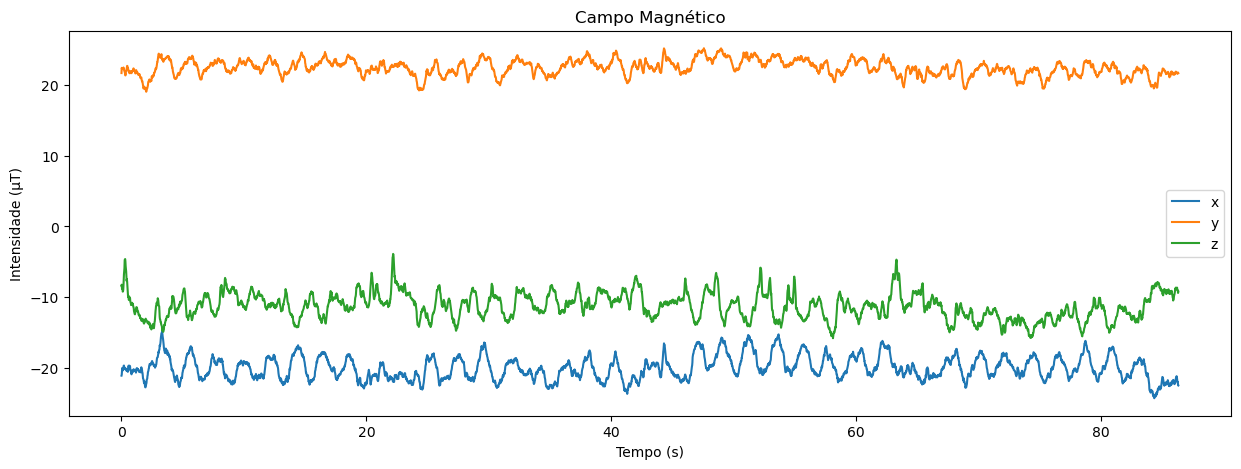

In [37]:
mu_reta_sample = mu_reta_ds.instance
print(f"Instância: '{mu_reta_sample.name}'")
mu_reta_sample_magnet = mu_reta_sample.sensors3['ak09918 magnetometer'] 

plotxyz(mu_reta_sample_magnet, dimensions='xyz', title="Campo Magnético", ylabel="Intensidade (μT)")

- #### **Giroscópio** (rotação)

Instância: '2-2025-05-22-14-58-55-062'


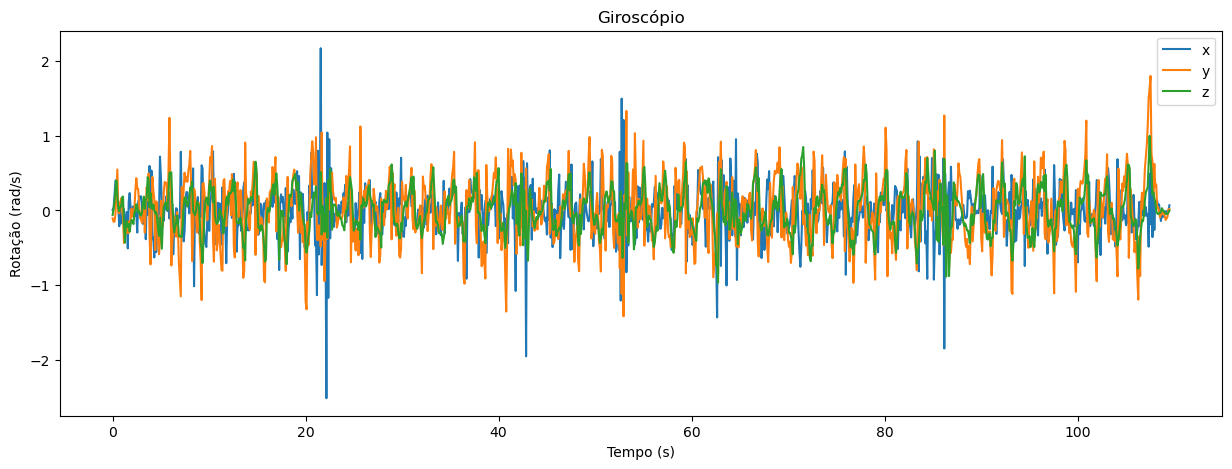

In [38]:
mu_reta_sample = mu_reta_ds.instance
print(f"Instância: '{mu_reta_sample.name}'")
mu_reta_sample_gyro = mu_reta_sample.sensors3['lsm6dso lsm6dso gyroscope non-wakeup'] 

plotxyz(mu_reta_sample_gyro, dimensions='xyz', title="Giroscópio", ylabel="Rotação (rad/s)")

---
## MU Zigue Zague

- #### **Aceleração Linear**

Instância: '1-2025-05-22-15-22-05-446'


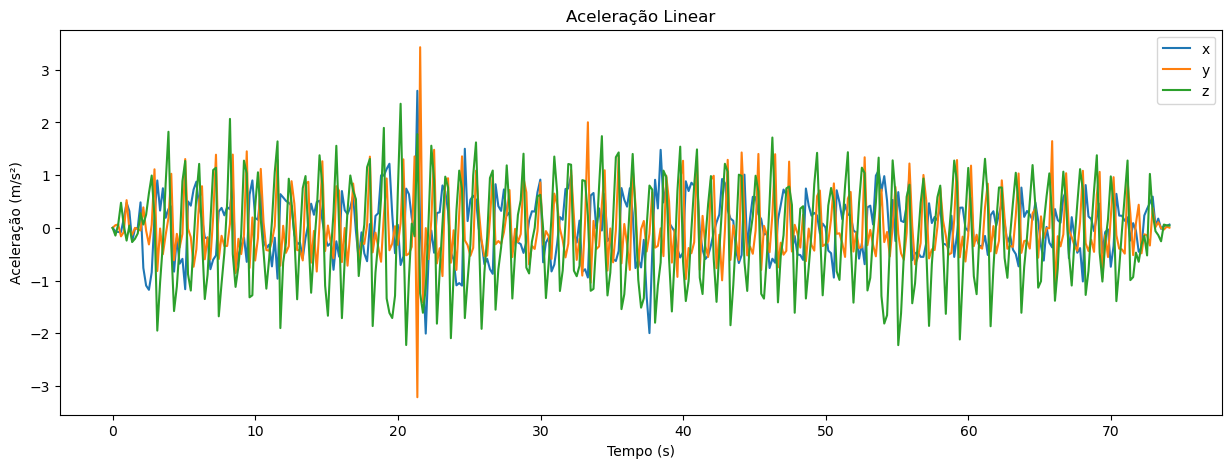

In [39]:
mu_zz_sample = mu_zz_ds.instance
print(f"Instância: '{mu_zz_sample.name}'")
mu_zz_sample_accel = mu_zz_sample.sensors3['linear_acceleration']

plotxyz(mu_zz_sample_accel, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

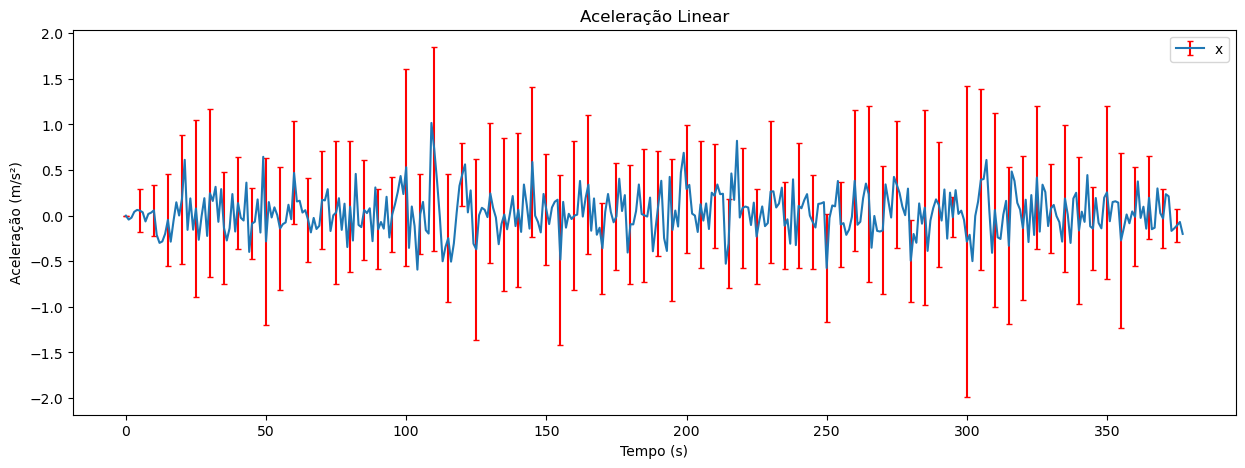

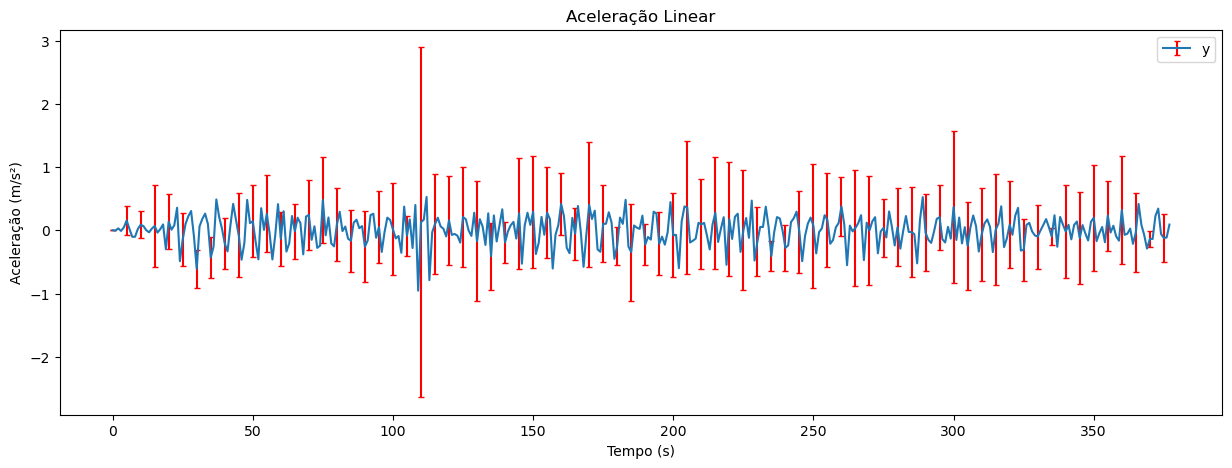

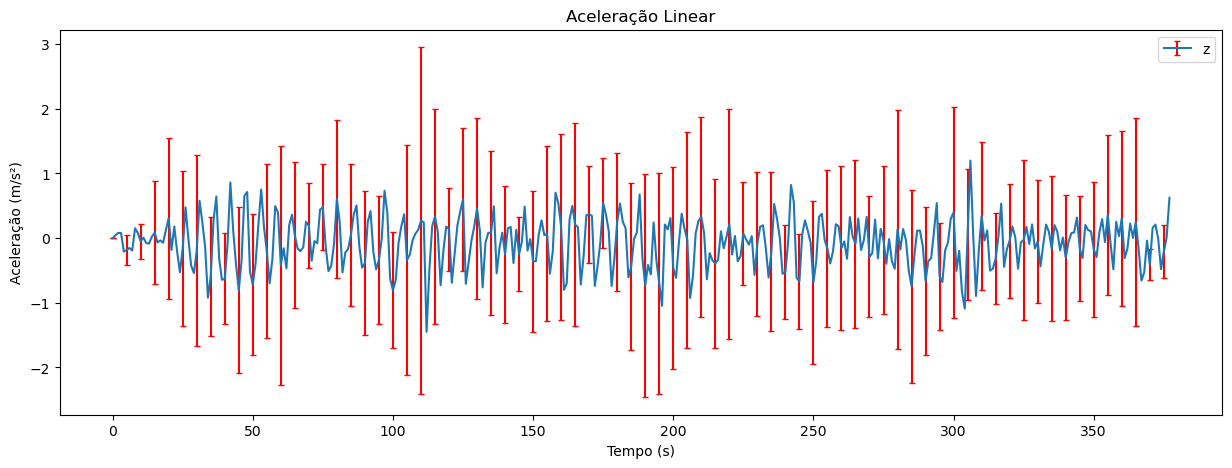

In [40]:
instances_accel = list(map(lambda x: x.sensors3['linear_acceleration'][['x', 'y', 'z']][:378].reset_index(), mu_zz_ds.instances.values()))

instances_mean = pd.concat(instances_accel).groupby(level=0).mean()
instances_std = pd.concat(instances_accel).groupby(level=0).std()

plotmean(instances_mean, instances_std, dimensions='x', title="Aceleração Linear", ylabel="Aceleração (m/s²)")
plotmean(instances_mean, instances_std, dimensions='y', title="Aceleração Linear", ylabel="Aceleração (m/s²)")
plotmean(instances_mean, instances_std, dimensions='z', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

- #### **Campo magnético** (orientação)

Instância: '1-2025-05-22-15-09-47-015'


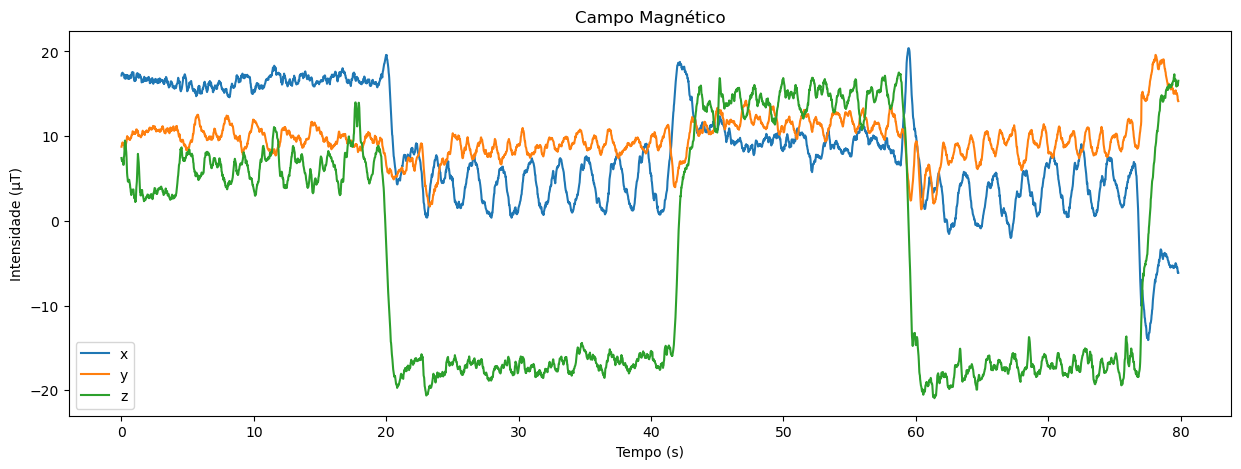

In [41]:
mu_zz_sample = mu_zz_ds.instance
print(f"Instância: '{mu_zz_sample.name}'")
mu_zz_sample_magnet = mu_zz_sample.sensors3['ak09918 magnetometer'] 

plotxyz(mu_zz_sample_magnet, dimensions='xyz', title="Campo Magnético", ylabel="Intensidade (μT)")

- #### **Giroscópio** (rotação)

Instância: '1-2025-05-22-15-18-30-442'


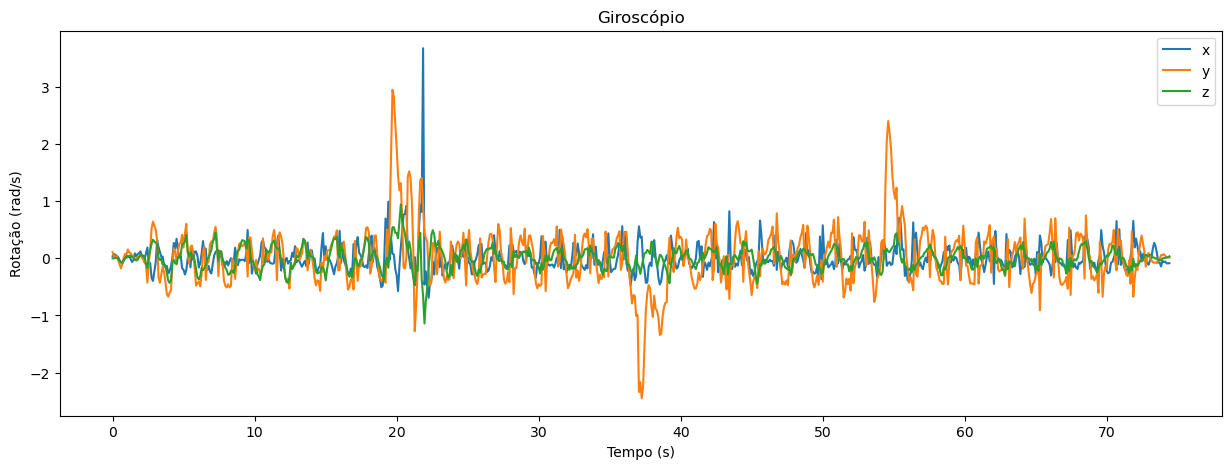

In [ ]:
mu_zz_sample = mu_zz_ds.instance
print(f"Instância: '{mu_zz_sample.name}'")
mu_zz_sample_gyro = mu_zz_sample.sensors3['lsm6dso lsm6dso gyroscope non-wakeup'] 

plotxyz(mu_zz_sample_gyro, dimensions='xyz', title="Giroscópio", ylabel="Rotação (rad/s)")

---
## MUV Reta

- #### **Aceleração Linear**

Instância: '2025-05-22-15-57-57-936'


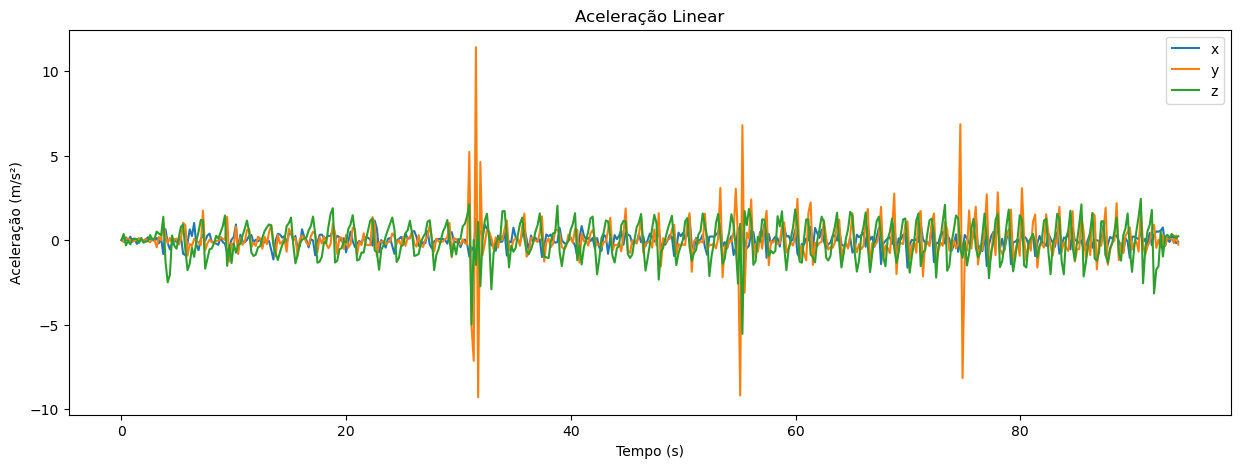

In [42]:
muv_reta_sample = muv_reta_ds.instance
print(f"Instância: '{muv_reta_sample.name}'")
muv_reta_sample_accel = muv_reta_sample.sensors3['linear_acceleration']

plotxyz(muv_reta_sample_accel, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

- #### **Campo magnético** (orientação)

Instância: '2025-05-22-15-55-52-858'


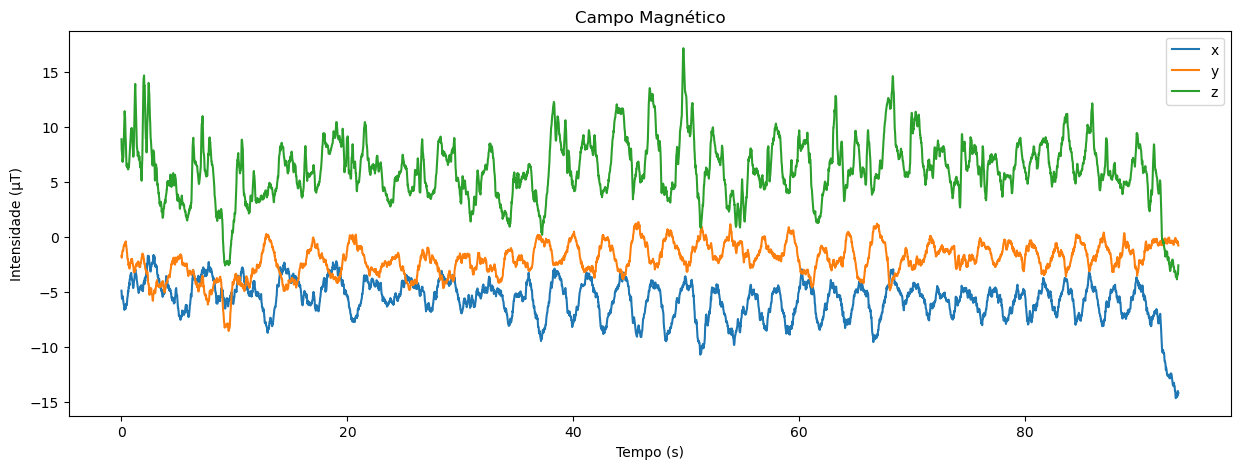

In [43]:
muv_reta_sample = muv_reta_ds.instance
print(f"Instância: '{muv_reta_sample.name}'")
muv_reta_sample_magnet = muv_reta_sample.sensors3['ak09918 magnetometer'] 

plotxyz(muv_reta_sample_magnet, dimensions='xyz', title="Campo Magnético", ylabel="Intensidade (μT)")

- #### **Giroscópio** (rotação)

Instância: '2025-05-22-15-55-52-858'


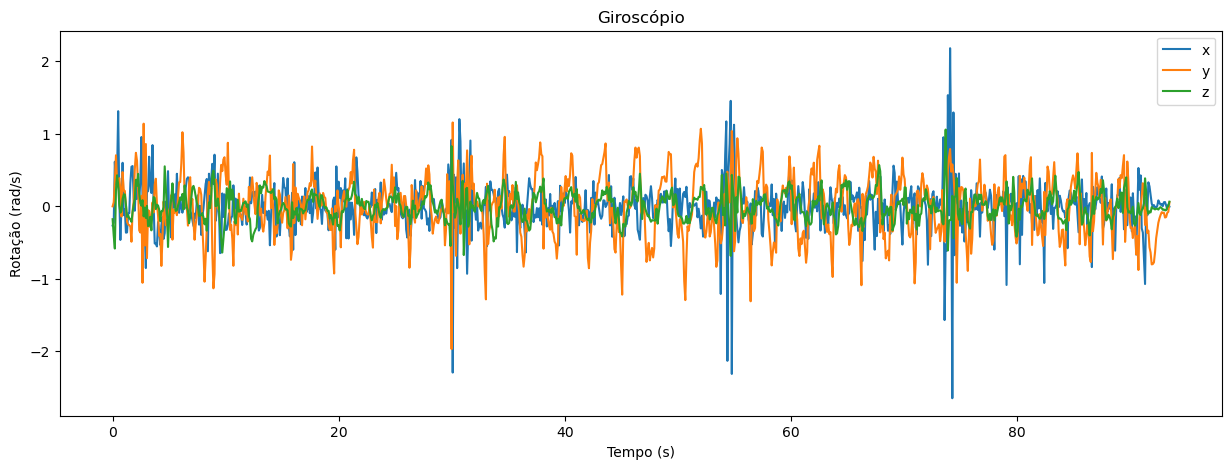

In [44]:
muv_reta_sample = muv_reta_ds.instance
print(f"Instância: '{muv_reta_sample.name}'")
muv_reta_sample_gyro = muv_reta_sample.sensors3['lsm6dso lsm6dso gyroscope non-wakeup'] 

plotxyz(muv_reta_sample_gyro, dimensions='xyz', title="Giroscópio", ylabel="Rotação (rad/s)")

---
## MUV Zigue Zague

- #### **Aceleração Linear**

Instância: '1-2025-05-22-15-35-27-544'


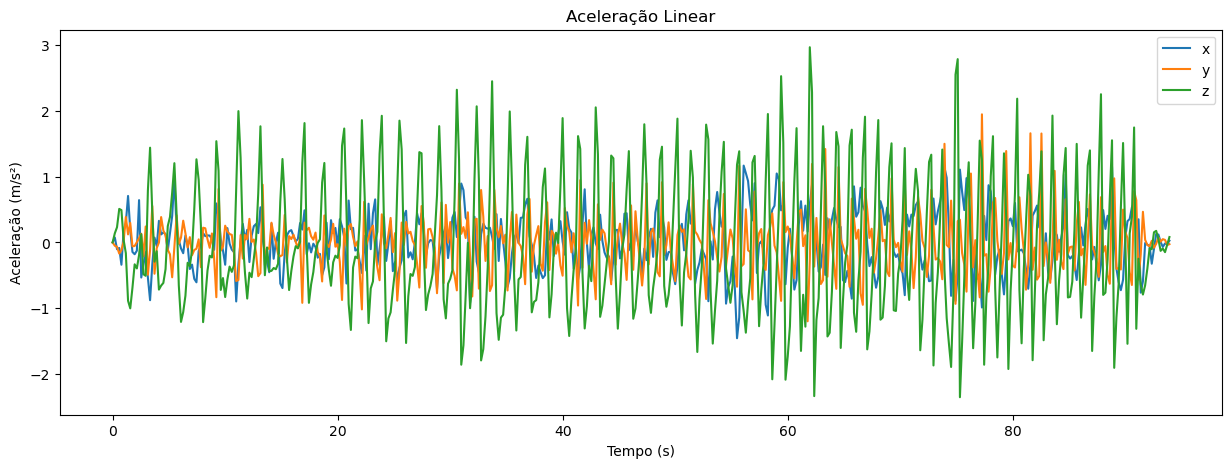

In [46]:
muv_zz_sample = muv_zz_ds.instance
print(f"Instância: '{muv_zz_sample.name}'")
muv_zz_sample_accel = muv_zz_sample.sensors3['linear_acceleration']

plotxyz(muv_zz_sample_accel, dimensions='xyz', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

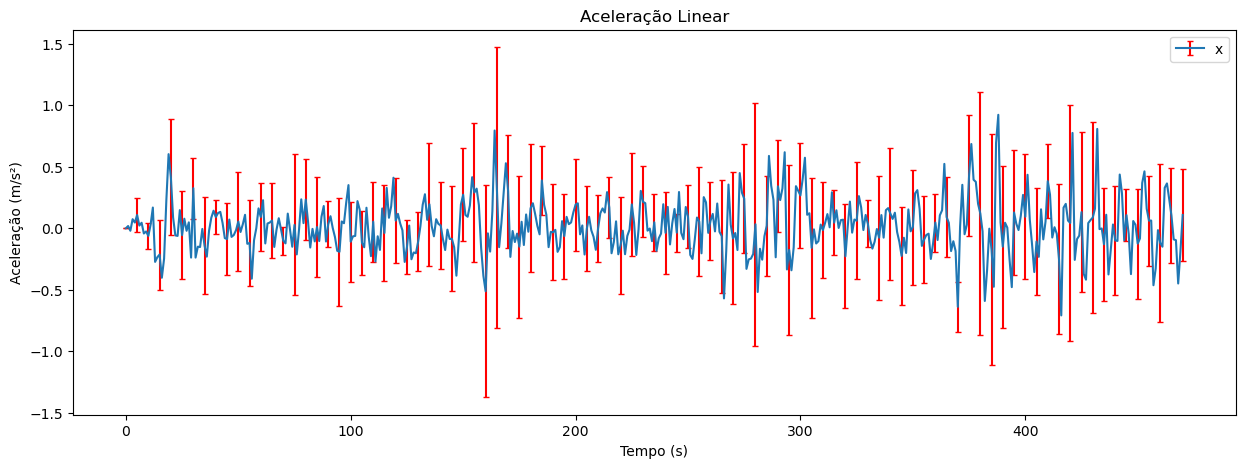

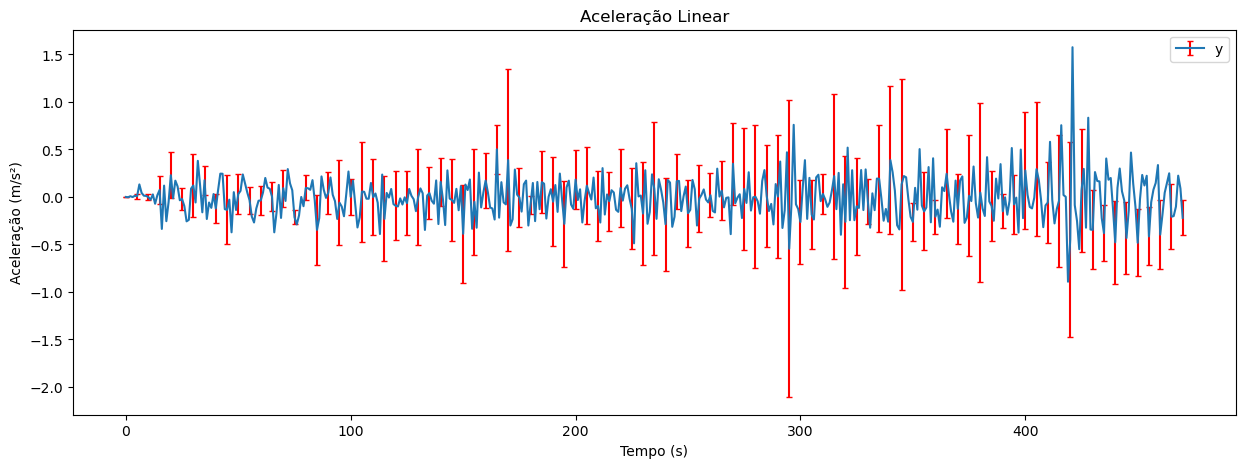

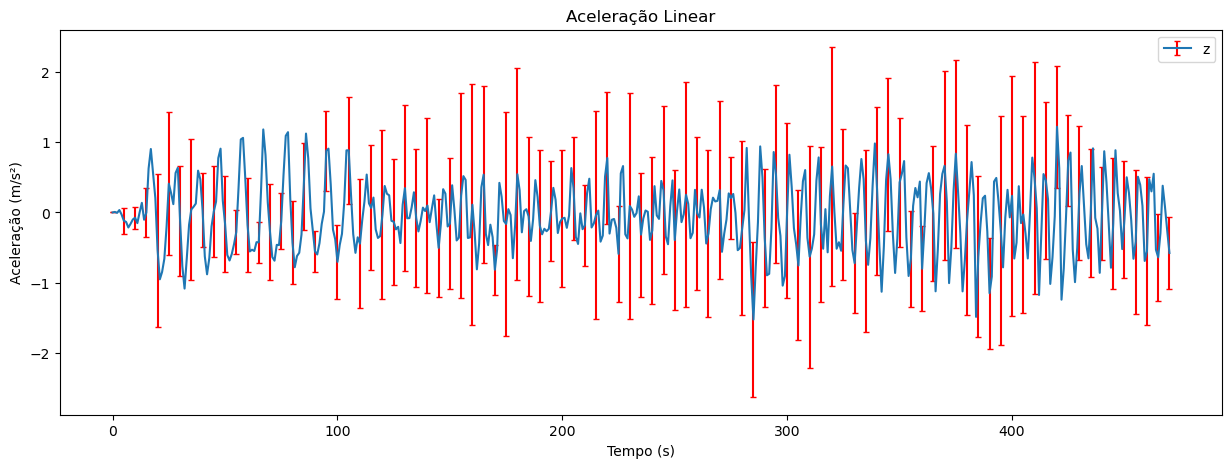

In [47]:
instances_accel = list(map(lambda x: x.sensors3['linear_acceleration'][['x', 'y', 'z']][:471].reset_index(), muv_zz_ds.instances.values()))

instances_mean = pd.concat(instances_accel).groupby(level=0).mean()
instances_std = pd.concat(instances_accel).groupby(level=0).std()

plotmean(instances_mean, instances_std, dimensions='x', title="Aceleração Linear", ylabel="Aceleração (m/s²)")
plotmean(instances_mean, instances_std, dimensions='y', title="Aceleração Linear", ylabel="Aceleração (m/s²)")
plotmean(instances_mean, instances_std, dimensions='z', title="Aceleração Linear", ylabel="Aceleração (m/s²)")

- #### **Campo magnético** (orientação)

Instância: '1-2025-05-22-15-39-52-283'


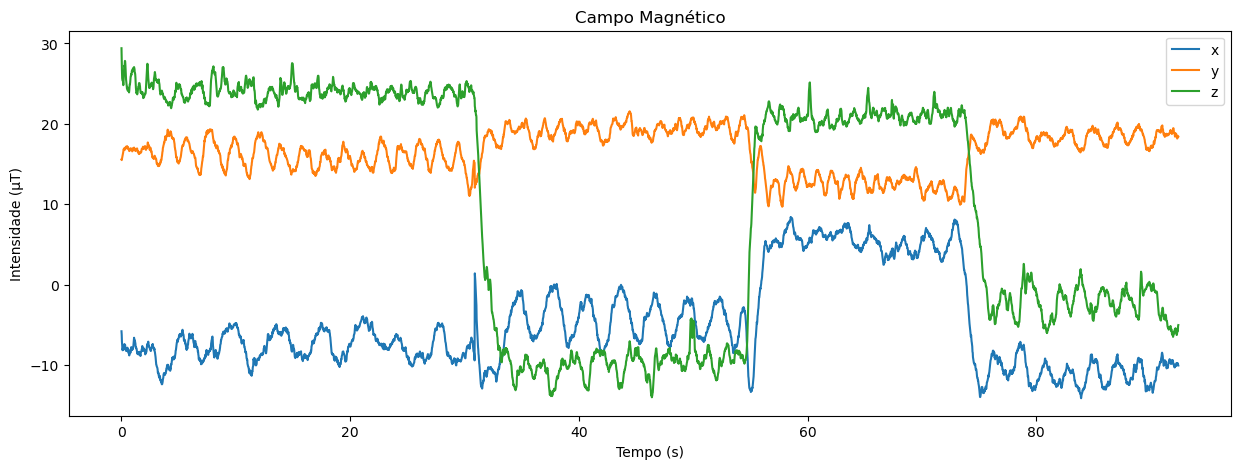

In [48]:
muv_zz_sample = muv_zz_ds.instance
print(f"Instância: '{muv_zz_sample.name}'")
muv_zz_sample_magnet = muv_zz_sample.sensors3['ak09918 magnetometer'] 

plotxyz(muv_zz_sample_magnet, dimensions='xyz', title="Campo Magnético", ylabel="Intensidade (μT)")

- #### **Giroscópio** (rotação)

Instância: '1-2025-05-22-15-35-27-544'


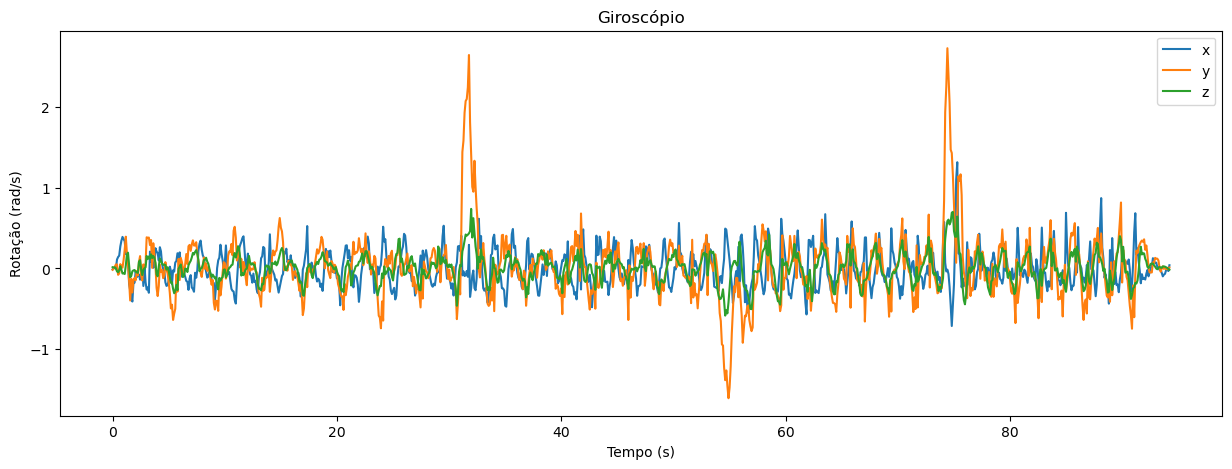

In [49]:
muv_zz_sample = muv_zz_ds.instance
print(f"Instância: '{muv_zz_sample.name}'")
muv_zz_sample_gyro = muv_zz_sample.sensors3['lsm6dso lsm6dso gyroscope non-wakeup'] 

plotxyz(muv_zz_sample_gyro, dimensions='xyz', title="Giroscópio", ylabel="Rotação (rad/s)")

---
# Dados reais

## Aceleração média

In [359]:
# Obtenção dos valores médios de aceleração

# Movimento retilíneo Uniforme
instances_accel = list(map(lambda x: x.sensors3['linear_acceleration'][['x', 'z']][:439].reset_index(), mu_reta_ds.instances.values()))

instances_mean = pd.concat(instances_accel).groupby(level=0).mean()
instances_std = pd.concat(instances_accel).groupby(level=0).std()

print("MRU:")
print(f"Aceleração média: {(np.mean(instances_mean["x"]) + np.mean(instances_mean["z"]))/2}")
print(f"Desvio Padrão: {(np.mean(instances_std["x"]) + np.mean(instances_std["z"]))/2}\n")


# Movimento em zigue zague uniforme
instances_accel = list(map(lambda x: x.sensors3['linear_acceleration'][['x', 'z']][:378].reset_index(), mu_zz_ds.instances.values()))

instances_mean = pd.concat(instances_accel).groupby(level=0).mean()
instances_std = pd.concat(instances_accel).groupby(level=0).std()

print("MZZU:")
print(f"Aceleração média: {(np.mean(instances_mean["x"]) + np.mean(instances_mean["z"]))/2}")
print(f"Desvio Padrão: {(np.mean(instances_std["x"]) + np.mean(instances_std["z"]))/2}\n")


# Movimento retilíneo acelerado
instances_accel = list(map(lambda x: x.sensors3['linear_acceleration'][['x', 'z']][:378].reset_index(), muv_reta_ds.instances.values()))

instances_mean = pd.concat(instances_accel).groupby(level=0).mean() ** 2
instances_std = pd.concat(instances_accel).groupby(level=0).std()

print("MRA:")
print(f"Aceleração média: {math.sqrt(np.mean(instances_mean["x"]) + np.mean(instances_mean["z"]))/2}")
print(f"Desvio Padrão: {(np.mean(instances_std["x"]) + np.mean(instances_std["z"]))/2}\n")


# Movimento em zigue zague acelerado
instances_accel = list(map(lambda x: x.sensors3['linear_acceleration'][['x', 'z']][:378].reset_index(), muv_zz_ds.instances.values()))

instances_mean = pd.concat(instances_accel).groupby(level=0).mean() ** 2
instances_std = pd.concat(instances_accel).groupby(level=0).std()

print("MZZA:")
print(f"Aceleração média: {math.sqrt((np.mean(instances_mean["x"]) + np.mean(instances_mean["z"])))/2}")
print(f"Desvio Padrão: {(np.mean(instances_std["x"]) + np.mean(instances_std["z"]))/2}")

MRU:
Aceleração média: 0.00570966506198633
Desvio Padrão: 0.9814482805493745

MZZU:
Aceleração média: -0.02007600667700681
Desvio Padrão: 0.9052276603004616

MRA:
Aceleração média: 0.272177419126079
Desvio Padrão: 0.7662146952310707

MZZA:
Aceleração média: 0.2537901551064295
Desvio Padrão: 0.6633793088377098


## Velocidade média

In [360]:
# Obtenção dos valores médios de velocidade

# Movimento retilíneo uniforme
instances_tempo = mu_reta_ds.instances
velocidades = []

for instance in instances_tempo:
    velocidades.append(32/ instances_tempo[instance].media_total_time)
    
print("MRU:")
print(f"Velocidade média: {np.mean(velocidades)}")
print(f"Desvio padrão: {np.std(velocidades)}\n")


# Movimento em zigue zague uniforme
instances_tempo = mu_zz_ds.instances
velocidades = []

for instance in instances_tempo:
    velocidades.append(32/ instances_tempo[instance].media_total_time)
    
print("MZZU:")
print(f"Velocidade média: {np.mean(velocidades)}")
print(f"Desvio padrão: {np.std(velocidades)}\n")


# Movimento retilíneo acelerado
instances_tempo = muv_reta_ds.instances
velocidades = []

for instance in instances_tempo:
    velocidades.append(32/ instances_tempo[instance].media_total_time)
    
print("MRA:")
print(f"Velocidade média: {np.mean(velocidades)}")
print(f"Desvio padrão: {np.std(velocidades)}\n")


# Movimento em zigue zague acelerado
instances_tempo = muv_zz_ds.instances
velocidades = []

for instance in instances_tempo:
    velocidades.append(32/ instances_tempo[instance].media_total_time)
    
print("MZZA:")
print(f"Velocidade média: {np.mean(velocidades)}")
print(f"Desvio padrão: {np.std(velocidades)}")

MRU:
Velocidade média: 0.32845944159506546
Desvio padrão: 0.04329534693240152

MZZU:
Velocidade média: 0.420965397504727
Desvio padrão: 0.010966328326722318

MRA:
Velocidade média: 0.3363686663276845
Desvio padrão: 0.0034266881221767746

MZZA:
Velocidade média: 0.33675824209414273
Desvio padrão: 0.006729207789428544


## Tempos de intervalo médios

In [ ]:
# Obtenção dos tempos médios de intervalos

# Movimento retilíneo Uniforme
instances_tempo = mu_reta_ds.instances

tempos = []
dp = []
media = []

for instance in instances_tempo:
    
    data = instances_tempo[instance].sensors3['linear_acceleration']
    

    data['magnitude'] = np.sqrt(
        data['x']**2 +
        data['y']**2 +
        data['z']**2
    )

    spike_indices = data.index[data['magnitude'] > 8]

    dummy = data.loc[spike_indices, 'Time (s)'].tolist()
    spike_tempos = [0, dummy[0]]
    last = dummy[0]
    final = instances_tempo[instance].media_total_time
    
    for num in dummy:
        if (num - last > 6 and not(final - num < 6)):
                spike_tempos.append(num)
                last = num
    
    if (final < 100):
        spike_tempos.append(final)

    tempos.append(spike_tempos)
    
for j in range(len(tempos)):
    
    media.append((tempos[0][j] + tempos[1][j] + tempos[2][j] + tempos[3][j] + tempos[4][j])/5)
    dp.append(np.std([tempos[0][j], tempos[1][j], tempos[2][j], tempos[3][j], tempos[4][j]]))

print("MRU:")
print(f"Tempos de intervalo médios: {media}")
print(f"Desvio padrão: {dp}\n")


# Movimento em zigue zague uniforme

instances_tempo = mu_zz_ds.instances

tempos = []
dp = []
media = []


for instance in instances_tempo:
    
    data = instances_tempo[instance].sensors3['lsm6dso lsm6dso gyroscope non-wakeup']
    
    acc_media = np.mean((data["x"] + data["z"])/2)

    data['magnitude'] = np.sqrt(
        data['x']**2 +
        data['y']**2 +
        data['z']**2
    )

    spike_indices = data.index[data['magnitude'] > 1.5]

    dummy = data.loc[spike_indices, 'Time (s)'].tolist()
    spike_tempos = [0, dummy[0]]
    last = dummy[0]
    final = instances_tempo[instance].media_total_time
    
    for num in dummy:
        if (num - last > 6 and not(final - num < 6)):
                spike_tempos.append(num)
                last = num
    
    spike_tempos.append(final)

    tempos.append(spike_tempos)
    
for j in range(len(tempos)):
    
    media.append((tempos[0][j] + tempos[1][j] + tempos[2][j] + tempos[3][j] + tempos[4][j])/5)
    dp.append(np.std([tempos[0][j], tempos[1][j], tempos[2][j], tempos[3][j], tempos[4][j]]))

print("MZZU:")
print(f"Tempos de intervalo médios: {media}")
print(f"Desvio padrão: {dp}\n")


# Movimento retilíneo acelerado
instances_tempo = muv_reta_ds.instances

tempos = []
dp = []
media = []

for instance in instances_tempo:
    
    data = instances_tempo[instance].sensors3['linear_acceleration']
    
    acc_media = math.sqrt(np.mean((data["x"]**2 + data["z"]**2)/2))

    data['magnitude'] = np.sqrt(
        data['x']**2 +
        data['y']**2 +
        data['z']**2
    )

    spike_indices = data.index[data['magnitude'] > 7]

    dummy = data.loc[spike_indices, 'Time (s)'].tolist()
    spike_tempos = [0, dummy[0]]
    last = dummy[0]
    final = instances_tempo[instance].media_total_time
    
    for num in dummy:
        if (num - last > 6 and not(final - num < 6)):
                spike_tempos.append(num)
                last = num
    
    spike_tempos.append(final)
    
    tempos.append(spike_tempos)
    
for j in range(len(tempos)):
    
    media.append((tempos[0][j] + tempos[1][j] + tempos[2][j] + tempos[3][j] + tempos[4][j])/5)
    dp.append(np.std([tempos[0][j], tempos[1][j], tempos[2][j], tempos[3][j], tempos[4][j]]))

print("MRA:")
print(f"Tempos de intervalo médios: {media}")
print(f"Desvio padrão: {dp}\n")


# Movimento em zigue zague acelerado

instances_tempo = muv_zz_ds.instances

tempos = []
dp = []
media = []

for instance in instances_tempo:
    
    data = instances_tempo[instance].sensors3['lsm6dso lsm6dso gyroscope non-wakeup']
    
    acc_media = math.sqrt(np.mean((data["x"]**2 + data["z"]**2)/2))

    data['magnitude'] = np.sqrt(
        data['x']**2 +
        data['y']**2 +
        data['z']**2
    )

    spike_indices = data.index[data['magnitude'] > 1.5]

    dummy = data.loc[spike_indices, 'Time (s)'].tolist()
    spike_tempos = [0, dummy[0]]
    last = dummy[0]
    final = instances_tempo[instance].media_total_time
    
    for num in dummy:
        if (num - last > 6 and not(final - num < 6) and len(spike_tempos) < 4):
                spike_tempos.append(num)
                last = num
    
    spike_tempos.append(final)

    tempos.append(spike_tempos)
    
for j in range(len(tempos)):
    
    media.append((tempos[0][j] + tempos[1][j] + tempos[2][j] + tempos[3][j] + tempos[4][j])/5)
    dp.append(np.std([tempos[0][j], tempos[1][j], tempos[2][j], tempos[3][j], tempos[4][j]]))

print("MZZA:")
print(f"Tempos de intervalo médios: {media}")
print(f"Desvio padrão: {dp}")

MRU:
Tempos de intervalo médios: [0.0, 21.6702, 43.0306, 64.00019999999999, 87.5416]
Desvio padrão: [0.0, 1.3957695225215376, 1.8013500048574689, 1.7234360330456133, 1.9219635376354034]

MZZU:
Tempos de intervalo médios: [0.0, 19.7794, 38.0856, 55.528800000000004, 76.0692]
Desvio padrão: [0.0, 0.292950234681592, 1.7125778931190268, 1.716229168846633, 2.0519986744635093]

MRA:
Tempos de intervalo médios: [0.0, 31.397999999999996, 55.033, 74.982, 95.14359999999999]
Desvio padrão: [0.0, 0.9059918321927635, 0.7749732898623027, 1.081945285123052, 0.9706071501900254]

MZZA:
Tempos de intervalo médios: [0.0, 31.5608, 55.2386, 75.0768, 95.06219999999999]
Desvio padrão: [0.0, 0.37901525035280625, 0.537158673019433, 1.0027536885995492, 1.9292279699403097]



## Dados de cada passeio separadamente

In [358]:
# Obtenção dos tempos de intervalos aproximados, velocidades e acelerações

# Movimento retilíneo Uniforme
instances_tempo = mu_reta_ds.instances

print("MRU:")

for instance in instances_tempo:
    data = instances_tempo[instance].sensors3['linear_acceleration']
    
    acc_media = np.mean((data["x"] + data["z"])/2)

    data['magnitude'] = np.sqrt(
        data['x']**2 +
        data['y']**2 +
        data['z']**2
    )

    spike_indices = data.index[data['magnitude'] > 8]

    dummy = data.loc[spike_indices, 'Time (s)'].tolist()
    spike_tempos = [0, dummy[0]]
    last = dummy[0]
    final = instances_tempo[instance].media_total_time
    
    for num in dummy:
        if (num - last > 6 and not(final - num < 6)):
                spike_tempos.append(num)
                last = num
    
    if (final < 100):
        spike_tempos.append(final)

    print(f"Tempos de Intervalo: {spike_tempos} | Velocidade média: {32/spike_tempos[4]} | Acelerção média: {acc_media}")
    
print()


# Movimento em zigue zague uniforme

instances_tempo = mu_zz_ds.instances

print("MZZU:")

for instance in instances_tempo:
    
    data = instances_tempo[instance].sensors3['lsm6dso lsm6dso gyroscope non-wakeup']
    
    acc_media = np.mean((data["x"] + data["z"])/2)

    data['magnitude'] = np.sqrt(
        data['x']**2 +
        data['y']**2 +
        data['z']**2
    )

    spike_indices = data.index[data['magnitude'] > 1.5]

    dummy = data.loc[spike_indices, 'Time (s)'].tolist()
    spike_tempos = [0, dummy[0]]
    last = dummy[0]
    final = instances_tempo[instance].media_total_time
    
    for num in dummy:
        if (num - last > 6 and not(final - num < 6)):
                spike_tempos.append(num)
                last = num
    
    spike_tempos.append(final)

    print(f"Tempos de Intervalo: {spike_tempos} | Velocidade média: {32/final} | Acelerção média: {acc_media}")
    
print()


# Movimento retilíneo acelerado
instances_tempo = muv_reta_ds.instances

print("MRA:")

for instance in instances_tempo:
    
    data = instances_tempo[instance].sensors3['linear_acceleration']
    
    acc_media = math.sqrt(np.mean((data["x"]**2 + data["z"]**2)/2))

    data['magnitude'] = np.sqrt(
        data['x']**2 +
        data['y']**2 +
        data['z']**2
    )

    spike_indices = data.index[data['magnitude'] > 7]

    dummy = data.loc[spike_indices, 'Time (s)'].tolist()
    spike_tempos = [0, dummy[0]]
    last = dummy[0]
    final = instances_tempo[instance].media_total_time
    
    for num in dummy:
        if (num - last > 6 and not(final - num < 6)):
                spike_tempos.append(num)
                last = num
    
    spike_tempos.append(final)
    
    print(f"Tempos de Intervalo: {spike_tempos} | Velocidade média: {32/final} | Acelerção média: {acc_media}")
    
print()


# Movimento em zigue zague acelerado

instances_tempo = muv_zz_ds.instances

print("MZZA:")

for instance in instances_tempo:
    
    data = instances_tempo[instance].sensors3['lsm6dso lsm6dso gyroscope non-wakeup']
    
    acc_media = math.sqrt(np.mean((data["x"]**2 + data["z"]**2)/2))

    data['magnitude'] = np.sqrt(
        data['x']**2 +
        data['y']**2 +
        data['z']**2
    )

    spike_indices = data.index[data['magnitude'] > 1.5]

    dummy = data.loc[spike_indices, 'Time (s)'].tolist()
    spike_tempos = [0, dummy[0]]
    last = dummy[0]
    final = instances_tempo[instance].media_total_time
    
    for num in dummy:
        if (num - last > 6 and not(final - num < 6) and len(spike_tempos) < 4):
                spike_tempos.append(num)
                last = num
    
    spike_tempos.append(final)

    print(f"Tempos de Intervalo: {spike_tempos} | Velocidade média: {32/final} | Acelerção média: {acc_media}")

MRU:
Tempos de Intervalo: [0, 23.899, 45.856, 65.458, 87.353] | Velocidade média: 0.3663297196432865 | Acelerção média: 0.015295396309572072
Tempos de Intervalo: [0, 22.539, 44.482, 65.857, 90.913] | Velocidade média: 0.35198486465082 | Acelerção média: 0.0332996074245671
Tempos de Intervalo: [0, 20.163, 41.501, 63.82, 86.541] | Velocidade média: 0.36976693128112686 | Acelerção média: -0.01860589311604545
Tempos de Intervalo: [0, 21.366, 41.761, 63.905, 85.093] | Velocidade média: 0.37605913529902574 | Acelerção média: -0.022976264988530462
Tempos de Intervalo: [0, 20.384, 41.553, 60.961, 87.808] | Velocidade média: 0.36443148688046645 | Acelerção média: 0.003722658368449118

MZZU:
Tempos de Intervalo: [0, 19.801, 41.459, 58.898, 80.068] | Velocidade média: 0.3996602887545586 | Acelerção média: 0.0004775662866339059
Tempos de Intervalo: [0, 20.287, 37.731, 55.274, 75.934] | Velocidade média: 0.42141860036347356 | Acelerção média: -0.006228371079443725
Tempos de Intervalo: [0, 19.601, 3